In [1]:
import pandas as pd
import numpy as np

from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Import airline passenger numbers dataset, set the index frequency to 'MS' as holtwinters method requires an index.

In [44]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 6

In [3]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\datasets\AirPassengers.csv', index_col=0, parse_dates=True) 
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
df.index.freq = 'MS'

<AxesSubplot:xlabel='Month'>

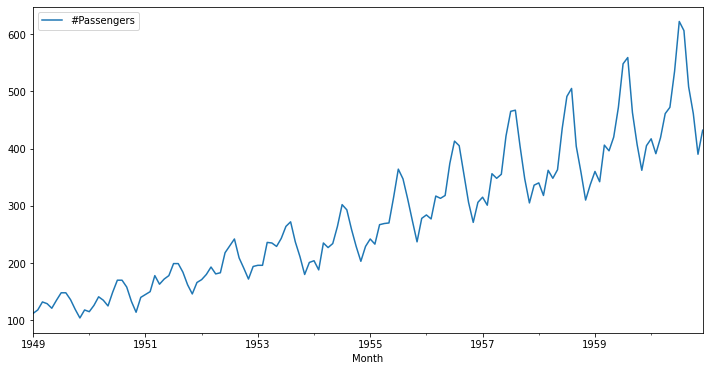

In [8]:
df.plot()

Split the dataset.

In [47]:
train, test = df.iloc[:-36], df.iloc[-36:]

Build the tripal exponential smoothing (TES) model, and forecast values for the next 3 years.

In [108]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train['#Passengers'], trend='add', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [109]:
preds = model.forecast(36)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Plot train, test and forecasted dataframe on top of each other.

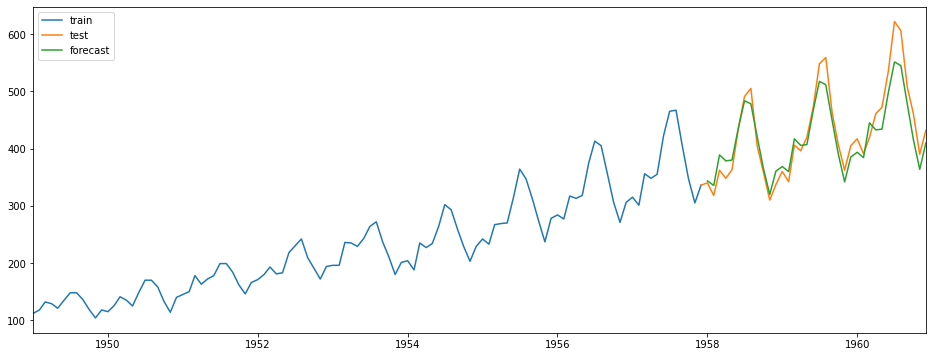

In [110]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(train.index, train['#Passengers'], label='train')
ax.plot(test.index, test['#Passengers'], label='test')
ax.plot(preds.index, preds.values, label='forecast')

ax.legend()
plt.autoscale(enable=True, axis='x', tight=True);

##### Evaluating model <br>
MAE

In [111]:
MAE = sum(abs(test.iloc[1:, 0].values - preds.values)) / len(preds)
MAE

22.629426882614332

In [112]:
test.mean()

#Passengers    426.0
dtype: float64

The model has around 5% error on average.

Although MAE is an intutive way to assess the model, it cannot alert us in case of the values that are way off than actual values. MSE can perform a better job in catching outliers in the forecasting model as it punishes larger errors more.

In [113]:
# MSE
MSE = sum((test.iloc[1:, 0].values - preds.values)**2)/len(preds)
MSE

749.0387591434284

RMSE

In [114]:
np.sqrt(MSE)

27.368572471786475

In [117]:
test.describe()

,#Passengers
count,37.000000
mean,426.000000
std,79.684099
min,310.000000
25%,362.000000
50%,407.000000
75%,472.000000
max,622.000000


Note that RMSE is less than the standard deviation of the test values, which is a good sign that the forecasting performs well.

Alternatively, we could have those metrics from the built-in libraries in scikit-learn.

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae, mse = mean_absolute_error(test.iloc[1:], preds), mean_squared_error(test.iloc[1:], preds)
print('mae:{}, mse: {}'.format(mae, mse))

mae:22.62942688261434, mse: 749.0387591434284


In [116]:
mean_absolute_error(test.iloc[1:], preds)

22.62942688261434

Build a TES this time trained on the entire dataset.

In [119]:
final_model = ExponentialSmoothing(df, trend='add', seasonal='mul', seasonal_periods=12).fit()
final_pred = final_model.forecast(36)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


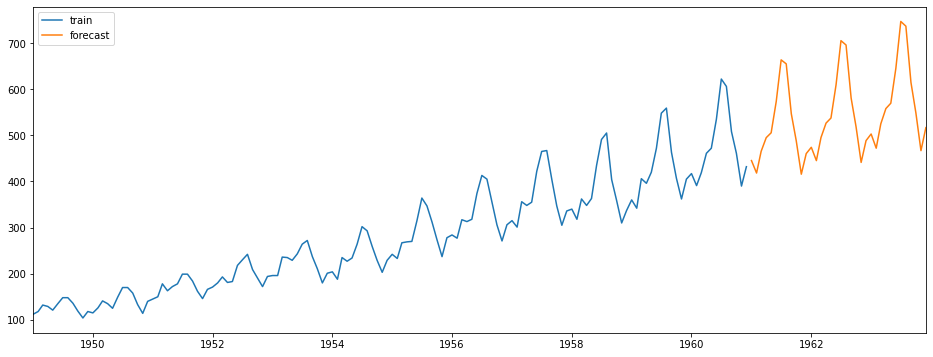

In [121]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(df.index, df['#Passengers'], label='train')
ax.plot(final_pred.index, final_pred.values, label='forecast')

ax.legend()
plt.autoscale(enable=True, axis='x', tight=True);

The predictions seem pretty reasonable. The trend is increasing linearly and the length of the seasons seem to be multiplicative in nature.